# Medical Image Processing MRI work

In [1]:
# import libraries

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t2_img= nib.load("data/mri/OBJECT_phantom_T2W_TSE_Cor_14_1.nii")

In [3]:
t2_data_header = t2_img.header
print(t2_data_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 432 432  30   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9259259 0.9259259 5.7360578 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 29
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Philips Healthcare Ingenia 5.4.1 '
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.008265011
quatern_c       : 0.7070585
quatern_d       : -0.7070585
qoffset_x       : 

In [4]:
# What is this- it is a dictionary. A dictionary will have keys and values!

In [5]:
# let's do this the less right way
print(t2_data_header.values()[7])

[  3 432 432  30   1   1   1   1]


In [6]:
#print(t2_data_header['key_name'])

In [7]:
#EXERCISE
print(t2_data_header['pixdim'])

[1.        0.9259259 0.9259259 5.7360578 0.        0.        0.
 0.       ]


In [8]:
t2_data = t2_img.get_fdata()
print(t2_data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [9]:
print(type(t2_data))

<class 'numpy.ndarray'>


In [10]:
# Notice we could actually access the picture another way
t2_img.dataobj

In [11]:
# What is an arrayproxy, and why do we care?
# 1. we accessed it as a property
# depends on exact library, but usually array proxies may be faster as a rule of thumb
# so I use it when graphing, the documentation is a bit opaque, but long

In [12]:
#t2_data. followed by Tab. gives us menu information on attributes + methods
t2_data.

SyntaxError: invalid syntax (3938222637.py, line 2)

#Exercise #2 : Use this, or the documentation, and print of the nuber of dimensions; then figure out the shape of the image and print it

In [13]:
print(t2_data.ndim)
print(t2_data.shape)

3
(432, 432, 30)


The three numbers given here represent the number of values along a respective dimension (x,y,z). This image was scanned in 30 slices, each with a resolution of 432 x 432 voxels. That means there are 30 * 432 * 432 = 5,598,720 voxels in total!

But what data type are these voxels?

In [14]:
print(t2_data.dtype)

float64


This tells us that each element in the array (or voxel) is a floating-point number.
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increase

In [15]:

print(np.min(t2_data))
print(np.max(t2_data))

0.0
630641.0785522461


for our r 3D arrayThe general formula to access a value value = data[x, y, z]

In [16]:
print(t2_data[9, 19, 2])

0.0


In [17]:
# let's start looking at whole slices, let's take the 10th slice
z_slice = t2_data[:, :, 9]

Exercise:

Select the 20th slice along the y-axis and store it in a variable. Then, select the 4th slice along the x-axis and store it in another variable.

In [18]:
# Awnser

In [19]:
y_slice = t2_data[:, 19, :]
x_slice = t2_data[3, :, :]

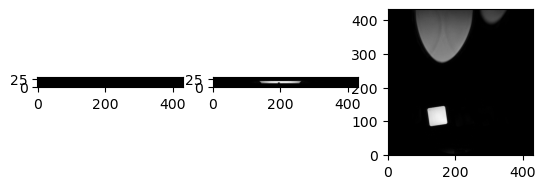

In [20]:
%matplotlib inline

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

# now let's get into something a bit more complex
# the affine matrixTo explain this concept, recall that we referred to coordinates in our data as (x,y,z) coordinates such that:

    x is the first dimension of t2_data
    y is the second dimension of t2_data
    z is the third dimension of t2_data

Although this tells us how to access our data in terms of voxels in a 3D volume, it doesn’t tell us much about the actual dimensions in our data (centimetres, right or left, up or down, back or front). The affine matrix allows us to translate between voxel coordinates in (x,y,z) and world space coordinates in (left/right, bottom/top, back/front). An important thing to note is that in reality in which order you have:

    Left/right
    Bottom/top
    Back/front

Depends on how you’ve constructed the affine matrix; thankfully there is in depth coverage of the issue the nibabel documentation For most of the the data we’re dealing with we use a RAS coordinate system so it always refers to:

    Right
    Anterior
    Superior


In [21]:

t2_affine = t2_img.affine
print(t2_affine)

[[-9.25672975e-01  2.16410652e-02 -1.74031337e-05  1.80819931e+02]
 [ 2.80924864e-06 -3.28338569e-08 -5.73605776e+00  2.11696911e+01]
 [-2.16410652e-02 -9.25672975e-01 -2.03403855e-07  3.84010071e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Applying the affine matrix (t2_affine) is done by using a linear map (matrix multiplication) on voxel coordinates (defined in t2_data).
If we want to know what the distances between these two voxels are in terms of real world distances (millimetres), this information cannot be derived from using voxel coordinates, and so we need the affine matrix.

Now finally, what is right and left, up and down?

Let's go back to the slides